In [1]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_moons

from scipy.sparse.csgraph import laplacian
from scipy.spatial.distance import pdist, squareform
from lund.lund import LearningbyUnsupervisedNonlinearDiffusion
from lund.utils import GraphExtractor,KDE
from model.utils import loadHSI,calculate_aligned_accuracy

# data_path, gt_path, data_name, gt_name = '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_corrected.mat', '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_gt.mat', 'salinasA_corrected', 'salinasA_gt'


# X, M, N, D, HSI, GT, Y, n, K = loadHSI(data_path, gt_path, data_name, gt_name)
# print(X.shape)
X, GT = make_moons(n_samples=1000, noise=0.1)
grid_size = int(np.ceil(np.sqrt(X.shape[0])))


print("Data shape:", X.shape)

# GT = GT - 1
# HSI = X.reshape((M, N, D))
Hyperparameters = {
    'Sigma': 1.0,
    'DiffusionNN': 10,
    'SpatialParams': {
        'GraphSpatialRadius': 12,
        'ConsensusSpatialRadius': 1,
        'ImageSize': (grid_size, grid_size)
    }
}

density_estimator = KDE()
graph_extractor = GraphExtractor()


p = density_estimator.kde(X)
G = graph_extractor.extract_graph(X)

t = 43

C, K, Dt = LearningbyUnsupervisedNonlinearDiffusion(X, t, G, p)



print("Cluster labels:", C)
print("Number of clusters:", K)
print("Diffusion distances:", Dt)

accuracy = calculate_aligned_accuracy(GT, C)
print("Aligned Accuracy:", accuracy)



Data shape: (1000, 2)
[[0.         0.51878668 0.06231764 ... 1.65771608 2.60316934 1.84412518]
 [0.51878668 0.         0.45670742 ... 1.54090421 2.27764225 1.70613678]
 [0.06231764 0.45670742 0.         ... 1.63071843 2.55707547 1.81563034]
 ...
 [1.65771608 1.54090421 1.63071843 ... 0.         1.22289231 0.19142814]
 [2.60316934 2.27764225 2.55707547 ... 1.22289231 0.         1.07723797]
 [1.84412518 1.70613678 1.81563034 ... 0.19142814 1.07723797 0.        ]]
entering try
 IS this working???


/Users/seoli/Desktop/DIAMONDS/Tufts2024/lund/utils.py:66: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  eigvals, eigvecs = eigs(P, k=n_eigs)


Eigenvalues shape: (1000,)
Eigenvectors shape: (1000, 1000)
sucessfully
entered lund
Number of Eigenvalues: 1000
Number of Eigenvectors: (1000, 1000)
replicate error
p is  [0.00082916 0.00093604 0.000852   0.0009635  0.00090023 0.00101884
 0.00108049 0.00107228 0.00119071 0.00075824 0.00101473 0.00102165
 0.00111609 0.00123772 0.00104782 0.00097771 0.00087163 0.00094251
 0.00087472 0.00070959 0.00100388 0.00092939 0.00103978 0.00075374
 0.00119768 0.00085888 0.00093686 0.00119768 0.00094671 0.00114869
 0.0006561  0.00115541 0.00063715 0.00124608 0.00104038 0.00083125
 0.00115007 0.00083799 0.00110812 0.00091752 0.000789   0.00115925
 0.00118225 0.00098148 0.00117781 0.00076978 0.00122511 0.0010595
 0.00112048 0.00085588 0.00073674 0.00100905 0.00114135 0.00121801
 0.0011032  0.00115299 0.00107191 0.00082613 0.00094174 0.00100799
 0.00111492 0.00119709 0.0010357  0.0012028  0.00091008 0.00120288
 0.00097264 0.00113467 0.00086738 0.00116914 0.00110125 0.00113198
 0.00094925 0.00105751 0.

d is squareformed
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.43590158  0.32226225  0.21865857 ...  0.07491427  0.65209678
   0.23922116]
 [ 0.70034113  0.61358289  0.4380892  ...  0.10711042  0.83759969
   0.38065287]
 ...
 [19.71043443 16.03736685 18.15893403 ... 16.27888733 16.72436558
  17.23678981]
 [19.75146551 16.16356399 18.48577213 ... 16.31392274 16.78013944
  17.56519395]
 [19.80679657 16.25174283 18.56901587 ... 16.44773254 16.90753688
  17.6515716 ]]
pre sum)
Updated


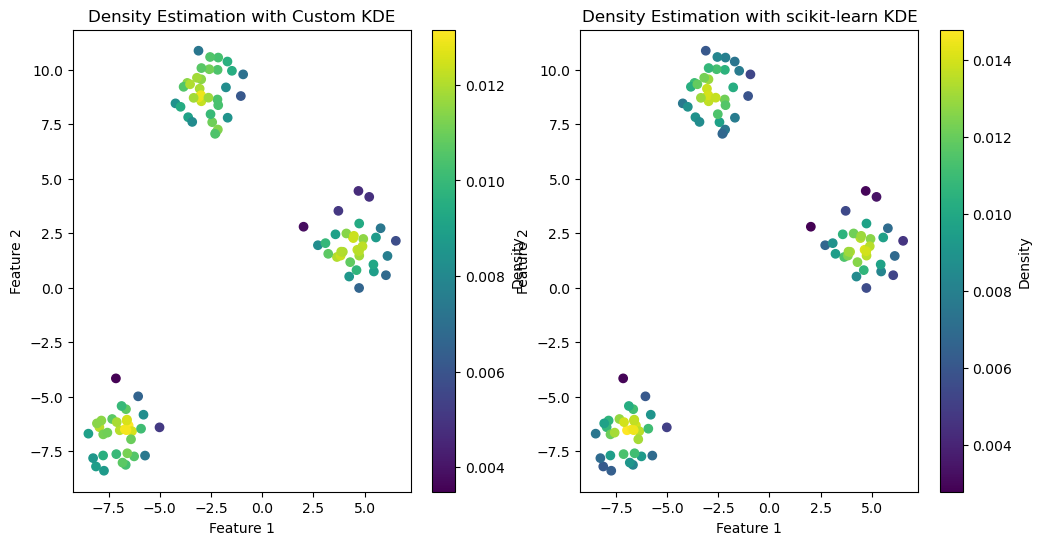

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from lund.utils import DensityEstimator


# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

density_estimator = DensityEstimator(DensityNN=5, Sigma0=1.0)
p_custom = density_estimator.kde(X)

# using sklearn as comparison
kde_sklearn = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X)
log_density = kde_sklearn.score_samples(X)
p_sklearn = np.exp(log_density)

p_custom /= np.sum(p_custom)
p_sklearn /= np.sum(p_sklearn)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sc1 = ax[0].scatter(X[:, 0], X[:, 1], c=p_custom, cmap='viridis')
ax[0].set_title('Density Estimation with Custom KDE')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
fig.colorbar(sc1, ax=ax[0], label='Density')

sc2 = ax[1].scatter(X[:, 0], X[:, 1], c=p_sklearn, cmap='viridis')
ax[1].set_title('Density Estimation with scikit-learn KDE')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
fig.colorbar(sc2, ax=ax[1], label='Density')

plt.show()